In [11]:
# All common imports
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
import numpy as np
import os
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats.stats import pearsonr
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score


# Loading and cleaning data to pandas dataframes
df_2015 = pd.read_csv('2015.csv')
df_2016 = pd.read_csv('2016.csv')
df_2017 = pd.read_csv('2017.csv')
df_2015.columns = [x.replace(' ', '.') for x in df_2015.columns]
df_2015.columns = [x.replace('(', '.') for x in df_2015.columns]
df_2015.columns = [x.replace(')', '.') for x in df_2015.columns]
df_2016.columns = [x.replace(' ', '.') for x in df_2016.columns]
df_2016.columns = [x.replace('(', '.') for x in df_2016.columns]
df_2016.columns = [x.replace(')', '.') for x in df_2016.columns]

# Uniformize the country name
df_2017.loc[df_2017['Country'] == 'Hong Kong S.A.R., China', 'Country'] = 'Hong Kong'

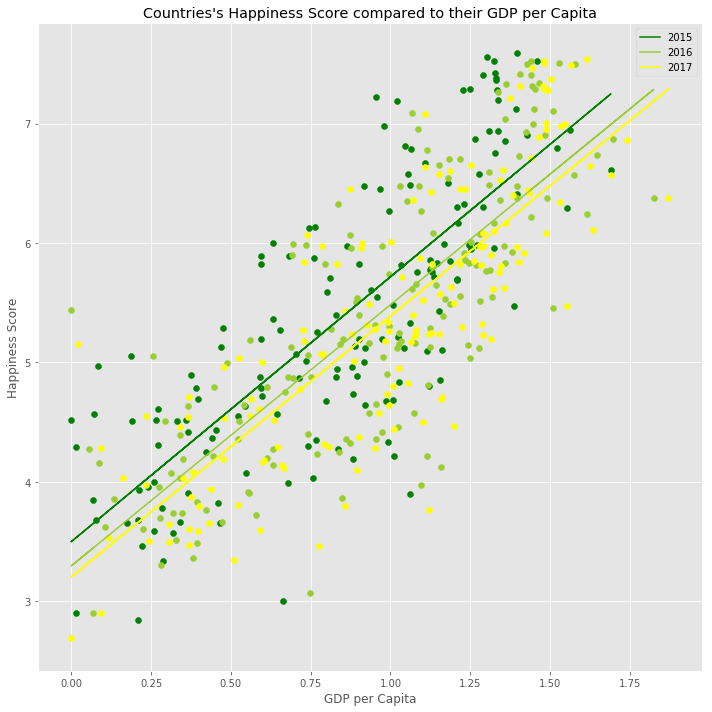

In [55]:
# Fitting only GDP per Capita to Happiness Score linear regression model
hs_2015 = df_2015['Happiness.Score']
hs_2016 = df_2016['Happiness.Score']
hs_2017 = df_2017['Happiness.Score']
gdp_2015 = df_2015['Economy..GDP.per.Capita.'].values.reshape(-1,1)
gdp_2016 = df_2016['Economy..GDP.per.Capita.'].values.reshape(-1,1)
gdp_2017 = df_2017['Economy..GDP.per.Capita.'].values.reshape(-1,1)

regr_2015 = linear_model.LinearRegression()
regr_2015.fit(gdp_2015, hs_2015)
regr_2016 = linear_model.LinearRegression()
regr_2016.fit(gdp_2016, hs_2016)
regr_2017 = linear_model.LinearRegression()
regr_2017.fit(gdp_2017, hs_2017)

# Plotting Happiness Score vs GDP for all countries
plt.figure(figsize=(10, 10))
plt.scatter(df_2015['Economy..GDP.per.Capita.'], df_2015['Happiness.Score'], color='green')
plt.scatter(df_2016['Economy..GDP.per.Capita.'], df_2016['Happiness.Score'], color='yellowgreen')
plt.scatter(df_2017['Economy..GDP.per.Capita.'], df_2017['Happiness.Score'], color='yellow')
plt.plot(gdp_2015, regr_2015.predict(gdp_2015), color='green')
plt.plot(gdp_2016, regr_2016.predict(gdp_2016), color='yellowgreen')
plt.plot(gdp_2017, regr_2017.predict(gdp_2017), color='yellow')
plt.legend(('2015','2016','2017'))
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.title('Countries\'s Happiness Score compared to their GDP per Capita')
plt.tight_layout()
plt.savefig('happiness_score-gdp_per_capita-ln.png')
plt.show()

Replacing Syrian Arab Republic with Syria
Replacing Yemen, Rep. with Yemen
Replacing Hong Kong SAR, China with Hong Kong
Replacing Iran, Islamic Rep. with Iran
Replacing Macedonia, FYR with Macedonia
Replacing Congo, Dem. Rep. with Congo (Kinshasa)
Replacing Congo, Rep. with Congo (Brazzaville)
Replacing Korea, Rep. with South Korea
Replacing Venezuela, RB with Venezuela
Replacing Egypt, Arab Rep. with Egypt
Replacing Russian Federation with Russia


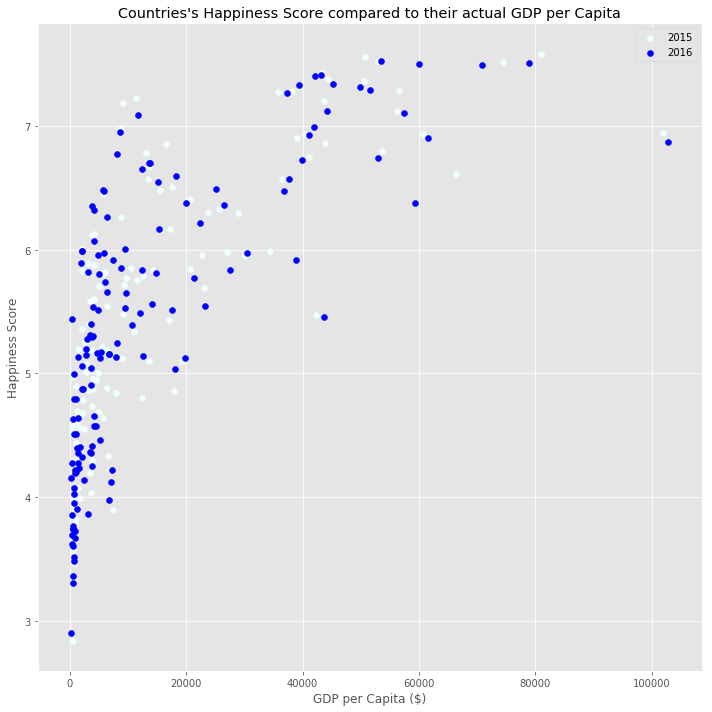

In [56]:
# Loading GDP data from World Bank
gdp = pd.read_csv('API_NY.GDP.PCAP.CD_DS2_en_csv_v2.csv', skiprows=4)
gdp = gdp.rename( columns = {'Country Name': 'Country'})

# Rename Country to match Gallup dataset
#  Yemen, Rep. --> Yemen
#  Hong Kong SAR, China --> Hong Kong
#  Iran, Islamic Rep. --> Iran
#  Macedonia, FYR --> Macedonia
#  Congo, Dem. Rep. --> Congo (Kinshasa)
#  Congo, Rep --> Congo (Brazzaville)
#  Korea, Rep. --> South Korea
#  Venezuela, RB --> Venezuela
#  Egypt, Arab Rep. --> Egypt
#  Russian Federation --> Russia

to_rename = {
    'Syrian Arab Republic': 'Syria',
    'Yemen, Rep.': 'Yemen',
    'Hong Kong SAR, China': 'Hong Kong',
    'Iran, Islamic Rep.': 'Iran',
    'Macedonia, FYR': 'Macedonia',
    'Congo, Dem. Rep.':'Congo (Kinshasa)',
    'Congo, Rep.': 'Congo (Brazzaville)',
    'Korea, Rep.': 'South Korea',
    'Venezuela, RB': 'Venezuela',
    'Egypt, Arab Rep.': 'Egypt',
    'Russian Federation': 'Russia'
}

def rename_country(wb_name, gallup_name):
    if len(gdp.loc[gdp['Country'] == wb_name, 'Country']) != 0:
        gdp.loc[gdp['Country'] == wb_name, 'Country'] = gallup_name
        print('Replacing {0} with {1}'.format(wb_name, gallup_name))

for k,v in to_rename.items():
    rename_country(k, v)

# Select only the country name and its GDP per capita in US dollar
gdp_wb_2015 = gdp[['Country','2015']]
gdp_wb_2016 = gdp[['Country','2016']]

# Merge with the Gallup dataset
gdp_2015 = pd.merge(df_2015, gdp_wb_2015, on='Country', how='inner')
gdp_2016 = pd.merge(df_2016, gdp_wb_2016, on='Country', how='inner')

hs_2015 = gdp_2015['Happiness.Score']
hs_2016 = gdp_2016['Happiness.Score']

# Plotting Happiness Score vs actual GDP per Capita for all countries
plt.figure(figsize=(10, 10))
plt.scatter(gdp_2015['2015'], gdp_2015['Happiness.Score'], color='azure')
plt.scatter(gdp_2016['2016'], gdp_2016['Happiness.Score'], color='blue')
plt.legend(('2015','2016'))
plt.xlabel('GDP per Capita ($)')
plt.ylabel('Happiness Score')
plt.title('Countries\'s Happiness Score compared to their actual GDP per Capita')
plt.tight_layout()
plt.savefig('happiness_score-gdp_per_capita.png')
plt.show()


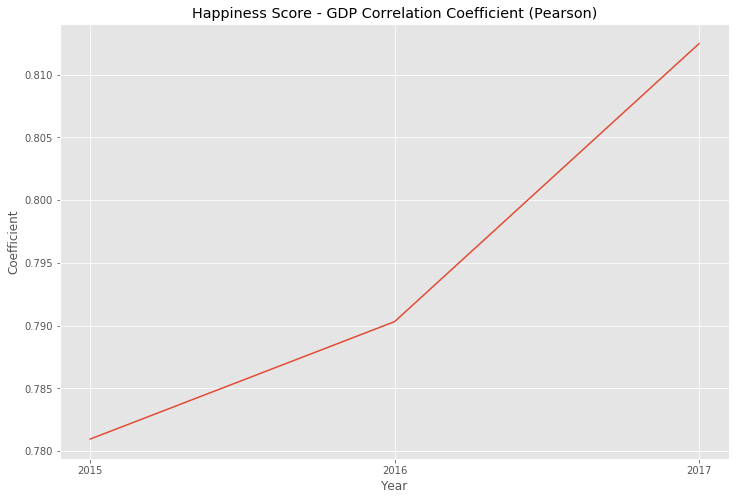

In [13]:
# Calculating Pearson correlation coefficient of GDP and happiness
gdpcorr = {}
gdpcorr['2015'] = np.corrcoef(df_2015['Economy..GDP.per.Capita.'], df_2015['Happiness.Score'])[0,1]
gdpcorr['2016'] = np.corrcoef(df_2016['Economy..GDP.per.Capita.'], df_2016['Happiness.Score'])[0,1]
gdpcorr['2017'] = np.corrcoef(df_2017['Economy..GDP.per.Capita.'], df_2017['Happiness.Score'])[0,1]

# Plotting coefficients over year
plt.figure(figsize=(12, 8))
plt.plot(gdpcorr.keys(), gdpcorr.values())
plt.xlabel('Year')
plt.ylabel('Coefficient')
plt.title('Happiness Score - GDP Correlation Coefficient (Pearson)')
plt.tight_layout()
plt.savefig('happiness_score-gdp_per_capita-corr.png')
plt.show()



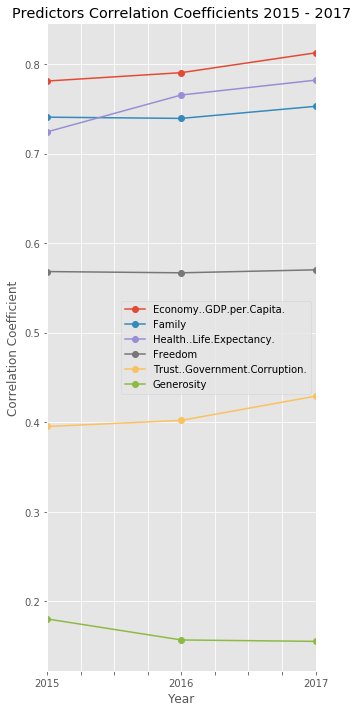

In [66]:
X_2015 = df_2015[['Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom','Trust..Government.Corruption.','Generosity', 'Dystopia.Residual']]
y_2015 = df_2015['Happiness.Score']
X_2016 = df_2016[['Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom','Trust..Government.Corruption.','Generosity', 'Dystopia.Residual']]
y_2016 = df_2016['Happiness.Score']
X_2017 = df_2017[['Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom','Trust..Government.Corruption.','Generosity', 'Dystopia.Residual']]
y_2017 = df_2017['Happiness.Score']

# Calculating Pearson correlation coefficient of Happiness and all features
corr = {}
corr['2015'] = pd.concat([y_2015, X_2015], axis=1).corr()['Happiness.Score']
corr['2016'] = pd.concat([y_2016, X_2016], axis=1).corr()['Happiness.Score']
corr['2017'] = pd.concat([y_2017, X_2017], axis=1).corr()['Happiness.Score']
df_corr = pd.DataFrame.from_dict(corr, orient='index')
df_corr = df_corr.drop(['Happiness.Score', 'Dystopia.Residual'], axis=1)
df_corr.plot(figsize=(5, 10), style = 'o-')
plt.xlabel('Year')
plt.ylabel('Correlation Coefficient')
plt.title('Happiness Score - Predictors Correlation Coefficients')
plt.tight_layout()
plt.savefig('predictors-corr.png')
plt.show()
# Plotting coefficients over year


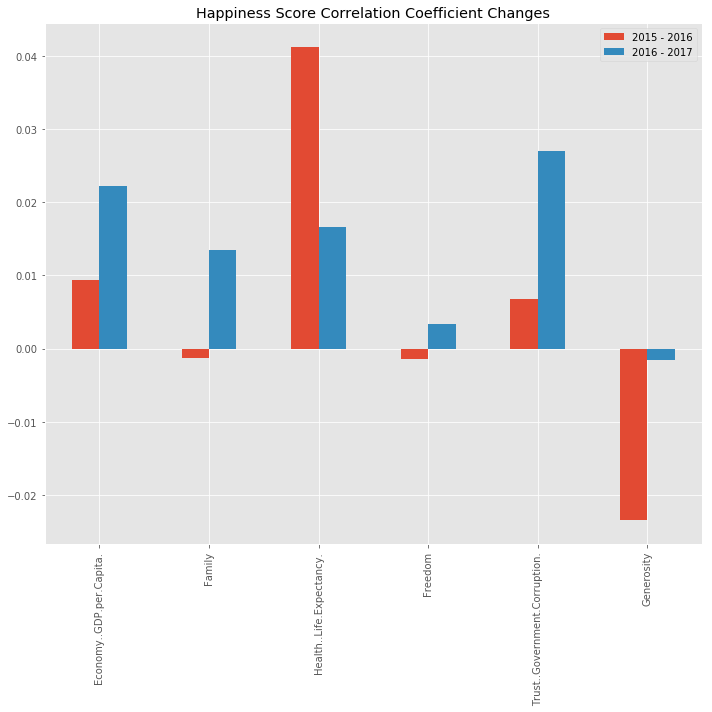

In [69]:
# calculating the changes in one year for each predictor
corrdiff_df = df_corr.diff()
corrdiff_df = corrdiff_df.drop(['2015']).transpose()
corrdiff_df.plot.bar(figsize=(10, 10))
plt.legend(('2015 - 2016','2016 - 2017'))
plt.title('Happiness Score Correlation Coefficient Changes')
plt.tight_layout()
plt.savefig('corr-changes.png')
plt.show()

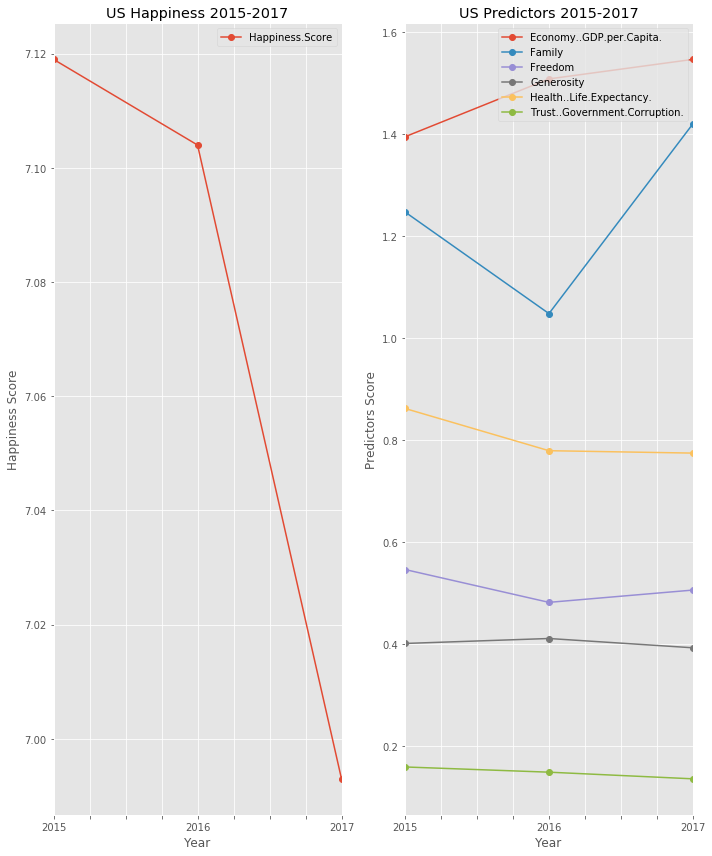

In [60]:
# Load US 

us_2015 = df_2015.loc[df_2015['Country'] == 'United States']
us_2015 = us_2015.drop(['Country', 'Region', 'Happiness.Rank', 'Standard.Error'], axis=1)
us_2016 = df_2016.loc[df_2016['Country'] == 'United States']
us_2016 = us_2016.drop(['Country', 'Region', 'Happiness.Rank', 'Lower.Confidence.Interval', 'Upper.Confidence.Interval'], axis=1)
us_2017 = df_2017.loc[df_2017['Country'] == 'United States']
us_2017 = us_2017.drop(['Country', 'Happiness.Rank', 'Whisker.low', 'Whisker.high'], axis=1)

new_index = ['2015', '2016', '2017']
us_df = pd.concat([us_2015, us_2016, us_2017], ignore_index=True)
us_df.index = new_index

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,12))

us_df[['Happiness.Score']].plot(ax=axes[0], style = 'o-')
axes[0].set_title('US Happiness 2015-2017')
axes[0].set_ylabel('Happiness Score')
axes[0].set_xlabel('Year')

us_df.drop(['Happiness.Score', 'Dystopia.Residual'], axis=1).plot(ax=axes[1], style = 'o-')
axes[1].set_title('US Predictors 2015-2017')
axes[1].set_ylabel('Predictors Score')
axes[1].set_xlabel('Year')

plt.tight_layout()
plt.savefig('US.png')
plt.show()